# Soil Fertility
Use elemetal soil analysis to determine the fertility of the soil.

**Input**
* N - ratio of Nitrogen (NH4+) content in soil
* P - ratio of Phosphorous (P) content in soil
* K - ratio of Potassium (K) content in soil
* ph - soil acidity (pH)
* ec - electrical conductivity
* oc - organic carbon
* S - sulfur (S)
* zn - Zinc (Zn)
* fe - Iron (Fe)
* cu - Copper (Cu)
* Mn - Manganese (Mn)
* B - Boron (B)

**Output**
* Class fertility (0 "Less Fertile", 1 "Fertile", 2 "Highly Fertile")


# Import Liberaries and Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree, ensemble
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Get the data



In [2]:
import numpy as np
import pandas as pd

In [5]:
df=pd.read_csv("D:\Agriculture project\dataset1.csv")

In [6]:
df

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output
0,138,8.6,560,7.46,0.62,0.70,5.90,0.24,0.31,0.77,8.71,0.11,0
1,213,7.5,338,7.62,0.75,1.06,25.40,0.30,0.86,1.54,2.89,2.29,0
2,163,9.6,718,7.59,0.51,1.11,14.30,0.30,0.86,1.57,2.70,2.03,0
3,157,6.8,475,7.64,0.58,0.94,26.00,0.34,0.54,1.53,2.65,1.82,0
4,270,9.9,444,7.63,0.40,0.86,11.80,0.25,0.76,1.69,2.43,2.26,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,351,10.7,623,7.96,0.51,0.29,7.24,0.36,4.69,0.69,11.03,0.69,1
876,264,9.0,486,7.24,0.47,0.10,3.92,0.35,8.26,0.45,7.98,0.40,1
877,276,9.2,370,7.62,0.62,0.49,6.64,0.42,3.57,0.63,6.48,0.32,1
878,320,13.8,391,7.38,0.65,1.07,5.43,0.58,4.58,1.02,13.25,0.53,2


# Data Exploration

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       880 non-null    int64  
 1   P       880 non-null    float64
 2   K       880 non-null    int64  
 3   pH      880 non-null    float64
 4   EC      880 non-null    float64
 5   OC      880 non-null    float64
 6   S       880 non-null    float64
 7   Zn      880 non-null    float64
 8   Fe      880 non-null    float64
 9   Cu      880 non-null    float64
 10  Mn      880 non-null    float64
 11  B       880 non-null    float64
 12  Output  880 non-null    int64  
dtypes: float64(10), int64(3)
memory usage: 89.5 KB


In [8]:
df.isnull().sum()

N         0
P         0
K         0
pH        0
EC        0
OC        0
S         0
Zn        0
Fe        0
Cu        0
Mn        0
B         0
Output    0
dtype: int64

No null values

In [9]:
df.describe()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output
count,880.00000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000
mean,246.73750,14.562159,499.978409,7.510500,0.543659,0.617989,7.545080,0.469273,4.140523,0.952443,8.666500,0.590159,0.588636
std,77.38886,21.967755,124.222838,0.464912,0.141597,0.842986,4.424184,1.894234,3.110011,0.465900,4.298828,0.570800,0.575462
min,6.00000,2.900000,11.000000,0.900000,0.100000,0.100000,0.640000,0.070000,0.210000,0.090000,0.110000,0.060000,0.000000
25%,201.00000,6.800000,412.000000,7.350000,0.430000,0.380000,4.700000,0.280000,2.050000,0.630000,6.225000,0.270000,0.000000
50%,257.00000,8.100000,475.000000,7.500000,0.545000,0.590000,6.640000,0.360000,3.565000,0.930000,8.345000,0.405000,1.000000
75%,307.00000,10.550000,581.000000,7.630000,0.640000,0.780000,8.750000,0.470000,6.320000,1.250000,11.472500,0.610000,1.000000
max,383.00000,125.000000,887.000000,11.150000,0.950000,24.000000,31.000000,42.000000,44.000000,3.020000,31.000000,2.820000,2.000000


In [12]:
df['Output'].value_counts()

Output
1    440
0    401
2     39
Name: count, dtype: int64

- 0 describes low-fertility
- 1 describes medium-fertility
- 2 describes high-fertility

In [14]:
df

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output
0,138,8.6,560,7.46,0.62,0.70,5.90,0.24,0.31,0.77,8.71,0.11,0
1,213,7.5,338,7.62,0.75,1.06,25.40,0.30,0.86,1.54,2.89,2.29,0
2,163,9.6,718,7.59,0.51,1.11,14.30,0.30,0.86,1.57,2.70,2.03,0
3,157,6.8,475,7.64,0.58,0.94,26.00,0.34,0.54,1.53,2.65,1.82,0
4,270,9.9,444,7.63,0.40,0.86,11.80,0.25,0.76,1.69,2.43,2.26,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,351,10.7,623,7.96,0.51,0.29,7.24,0.36,4.69,0.69,11.03,0.69,1
876,264,9.0,486,7.24,0.47,0.10,3.92,0.35,8.26,0.45,7.98,0.40,1
877,276,9.2,370,7.62,0.62,0.49,6.64,0.42,3.57,0.63,6.48,0.32,1
878,320,13.8,391,7.38,0.65,1.07,5.43,0.58,4.58,1.02,13.25,0.53,2


Correlation is a statical technique to show the relation between variables and if they depend on each other.

In [15]:
corr = df.corr()

In [16]:
corr

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output
N,1.000000,-0.010049,0.050616,0.075138,-0.005646,0.029887,-0.124959,0.054240,0.076108,-0.183832,0.105870,-0.170835,0.707383
P,-0.010049,1.000000,0.086964,0.004857,0.006082,-0.008996,-0.100204,-0.016912,0.141165,0.054689,0.045265,-0.097401,0.212780
K,0.050616,0.086964,1.000000,0.002661,-0.109726,-0.029005,0.026489,-0.002511,-0.053442,-0.005597,0.021157,0.108025,0.059666
pH,0.075138,0.004857,0.002661,1.000000,0.058217,-0.015926,0.013164,-0.008321,-0.032685,-0.000223,-0.008488,0.010115,0.082584
EC,-0.005646,0.006082,-0.109726,0.058217,1.000000,-0.007045,0.051810,-0.035703,-0.041525,0.035638,-0.043662,-0.004469,-0.025346
OC,0.029887,-0.008996,-0.029005,-0.015926,-0.007045,1.000000,0.046813,0.625683,0.282128,-0.009703,-0.078540,0.106760,0.035416
S,-0.124959,-0.100204,0.026489,0.013164,0.051810,0.046813,1.000000,-0.013870,-0.208752,0.158130,-0.226249,0.478017,-0.061733
Zn,0.054240,-0.016912,-0.002511,-0.008321,-0.035703,0.625683,-0.013870,1.000000,0.548485,-0.051229,-0.065154,0.056252,0.032089
Fe,0.076108,0.141165,-0.053442,-0.032685,-0.041525,0.282128,-0.208752,0.548485,1.000000,0.138121,0.275564,-0.332181,0.037625
Cu,-0.183832,0.054689,-0.005597,-0.000223,0.035638,-0.009703,0.158130,-0.051229,0.138121,1.000000,0.079934,0.101115,-0.136954


<Axes: >

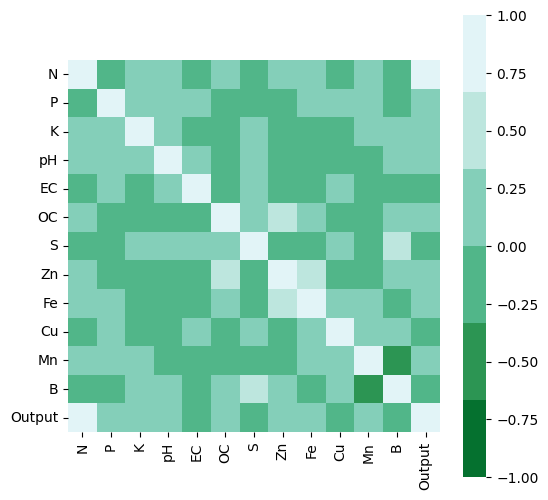

In [20]:
f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(corr,
    cmap=sns.color_palette("BuGn_r"),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

Divide data into X (features) and y (labels/targets).

In [28]:
y= df[['Output']]
x = df.drop('Output', axis=1)

In [29]:
x.head()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B
0,138,8.6,560,7.46,0.62,0.70,5.9,0.24,0.31,0.77,8.71,0.11
1,213,7.5,338,7.62,0.75,1.06,25.4,0.30,0.86,1.54,2.89,2.29
2,163,9.6,718,7.59,0.51,1.11,14.3,0.30,0.86,1.57,2.70,2.03
3,157,6.8,475,7.64,0.58,0.94,26.0,0.34,0.54,1.53,2.65,1.82
4,270,9.9,444,7.63,0.40,0.86,11.8,0.25,0.76,1.69,2.43,2.26


In [30]:
y.head()

,Output
0,0
1,0
2,0
3,0
4,1


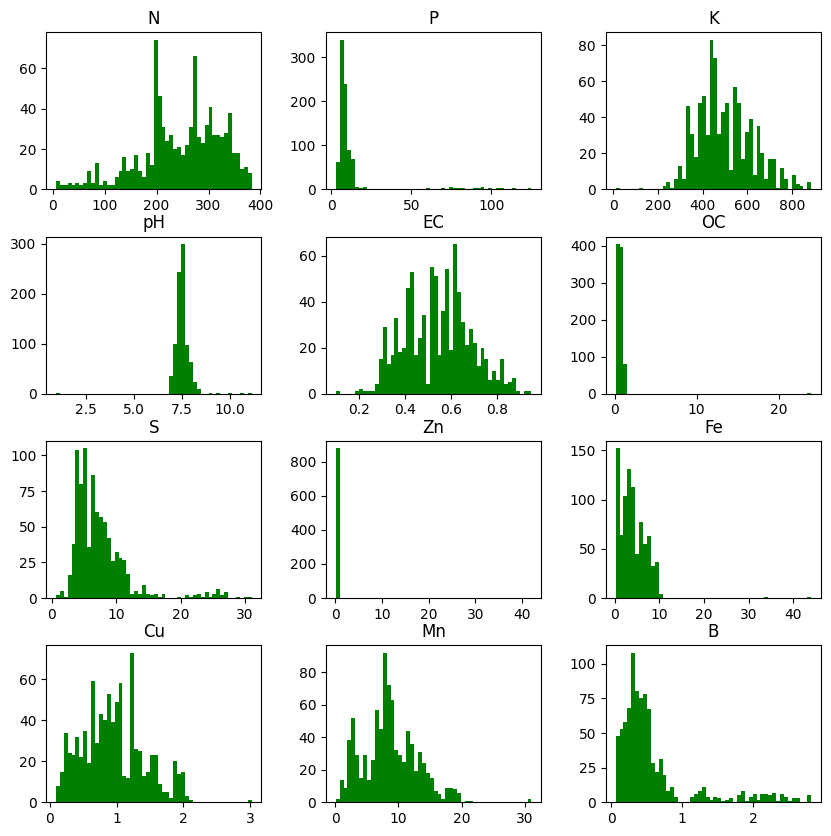

In [31]:
x.hist(bins=50, figsize=(10, 10), color ='green', grid=False)
plt.show()

# Prepare the Data for Machine Learning Algorithms

### Feature Scaling

We use Log Transform to convert skewed distibution to a normal distribution

In [32]:
transformedFeatures =x.apply(lambda x: np.log10(x) if np.issubdtype(x.dtype, np.number) else x)

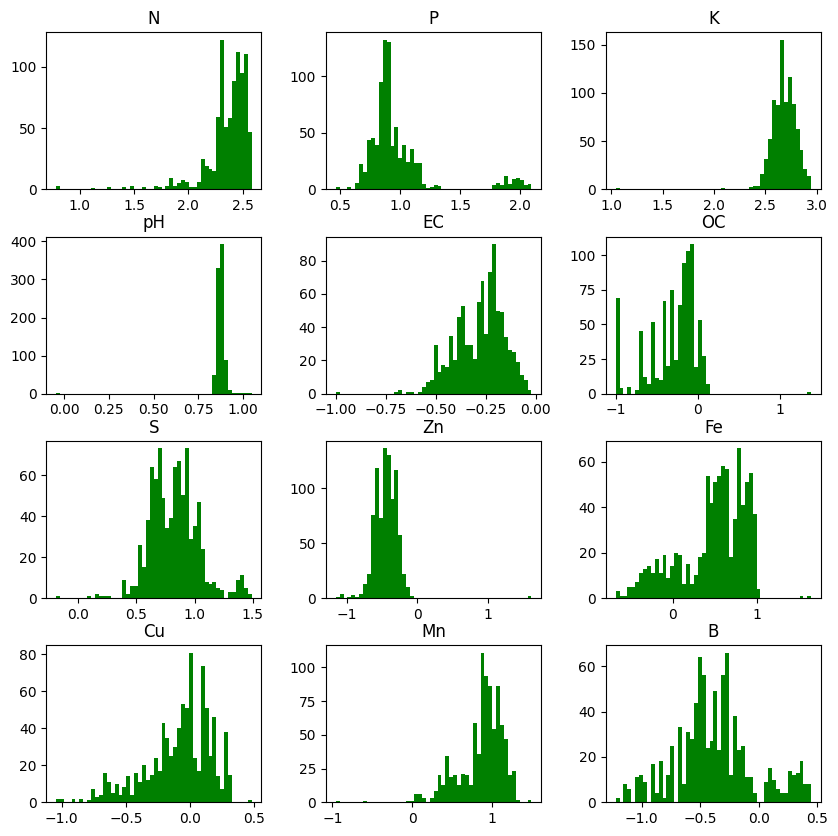

In [33]:
transformedFeatures.hist(bins=50, figsize=(10, 10), color='green', grid=False)
plt.show()

#Choose a Model

### Splitting data into train and val

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(transformedFeatures, y, test_size = 0.2, shuffle=True, random_state = 42)
print("Train Data Shape: ", x_train.shape)

Train Data Shape:  (704, 12)


In [42]:
y_train = y_train.values.ravel()

In [43]:
y_train 

array([1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 1, 1, 1, 2,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 2, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 2, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 0, 0, 2, 1, 0, 0, 2,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,

In [44]:
svcClf = SVC()
svcClf.fit(x_train, y_train)

SVC()

In [45]:
forestClf = ensemble.RandomForestClassifier()
forestClf.fit(x_train, y_train)

RandomForestClassifier()

In [46]:
knnClf = KNeighborsClassifier()
knnClf.fit(x_train,y_train)

KNeighborsClassifier()

In [47]:
treeClf = tree.DecisionTreeClassifier()
treeClf.fit(x_train, y_train)

DecisionTreeClassifier()

SVC  accuarcy is  0.7897727272727273
RandomForestClassifier  accuarcy is  0.8636363636363636
KNeighborsClassifier  accuarcy is  0.7329545454545454
DecisionTreeClassifier  accuarcy is  0.8465909090909091


<Axes: >

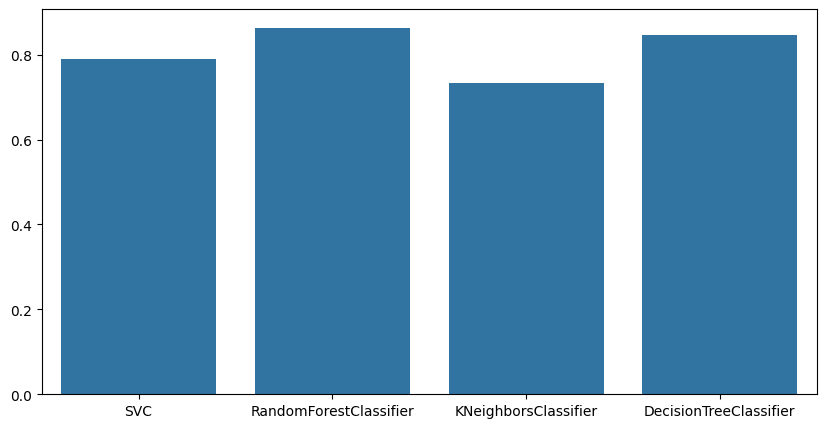

In [49]:
models = [svcClf, forestClf, knnClf, treeClf]
accs = []
titles = []

for model in models:
    pred = model.predict((x_test))
    model_acc = accuracy_score(y_test, pred)
    accs.append(model_acc)
    titles.append(type(model).__name__)
    print(type(model).__name__, " accuarcy is ", model_acc)

fig = plt.figure(figsize=(10, 5))
sns.barplot(x = titles, y=accs)

### Pros & Cons
**SVC**
1. clear margin of separation between classes
2. more effective in high dimensional spaces
3. effective in cases where the number of dimensions is greater than the number of samples
4. memory efficient                                                                                                          
5. not suitable for large data sets                                                                                          

**Random Forest Classifier**
1. quite fast
2. able to deal with unbalanced and missing data
3. may over-fit data sets that are particularly noisy
4. data-hungry



**DecisionTreeClassifier**
1. does not require normalization of data
2. does not require scaling of data as well
3. higher time to train the model

# Fine Tuning RandomForest 

In [57]:
# Define the Random Forest Classifier
forestClassifier = ensemble.RandomForestClassifier(random_state=42)

In [58]:
# Define the hyperparameter grid
paramGrid = {
    'n_estimators': [200, 300, 500],
    'max_features': ['sqrt', 'log2'],  # 'auto' is replaced with 'sqrt'
    'max_depth': [4, 5, 6, 7, 8, 9, 10],
    'criterion': ['gini', 'entropy']
}

In [59]:
# Initialize GridSearchCV
clf = GridSearchCV(estimator=forestClassifier, param_grid=paramGrid, cv=5)

In [60]:
# Fit the model
clf.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 300, 500]})

In [61]:
# Get the best parameters
best_params = clf.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 300}


In [62]:
# Train the Random Forest model with the best parameters
randomForestModel = ensemble.RandomForestClassifier(
    criterion=best_params['criterion'],
    max_depth=best_params['max_depth'],
    max_features=best_params['max_features'],
    n_estimators=best_params['n_estimators'],
    random_state=42
)

# Fit the Model

In [63]:
# Fit the model on the training data
randomForestModel.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=300, random_state=42)

In [64]:
# Make predictions on the validation set
predictions = randomForestModel.predict(x_test)


In [65]:
# Generate the classification report
report = classification_report(y_test, predictions)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92        78
           1       0.88      0.89      0.88        88
           2       0.00      0.00      0.00        10

    accuracy                           0.88       176
   macro avg       0.58      0.62      0.60       176
weighted avg       0.83      0.88      0.85       176



e:\Chest Cancer Classification\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Chest Cancer Classification\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Chest Cancer Classification\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
# Calculate and print the accuracy
model_acc = accuracy_score(y_test, predictions)
print("Model Accuracy:", model_acc)


Model Accuracy: 0.875


In [68]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

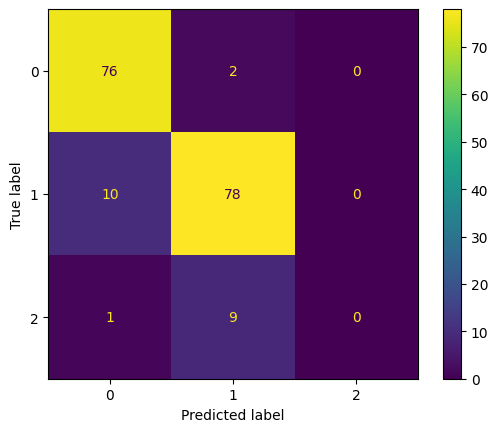

In [69]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

### Save model as pkl

In [72]:
import pickle

with open('random_forest_pkl.pkl', 'wb') as file:
    pickle.dump(model, file)

### Load model

In [73]:
with open('random_forest_pkl.pkl', 'rb') as file:
    model = pickle.load(file)